#### Distinguishing Sentiments

Background

Twitter has become a wildly sprawling jungle of information, 140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out per day. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

The first plot will be and/or feature the following:

* Scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the compound sentiment of a tweet.
* Each plot point sorted by its relative timestamp.

The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. This plot again aggregates the compound sentiments analyzed by VADER.



In [1]:
# Dependencies
 
from datetime import datetime
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Initialize variables for tweet/date array and last tweet id
tweet_result =[]
last_id = None

# Use function to repeat API calls and data accumulation

def grabber(target_user):

    target_user_texts=[]
    target_user_date=[]
    
    for x in range(5):
        
        target_user_tweets = api.user_timeline(target_user, page=x,since_id=last_id)
        
        for tweet in target_user_tweets:
            target_user_texts.append(tweet["text"])
            target_user_date.append(tweet["created_at"])   
            #print(f'{tweet["text"]}') 
            tweet_result.append(target_user_texts)
            tweet_result.append(target_user_date)
    return tweet_result    

# Run through the news outlets
grabber("@BBCNews")
BBCNews_texts=tweet_result[0]
BBCNews_date=tweet_result[1]
tweet_result =[]
last_id=None
grabber("@CBSNews")
CBSNews_texts=tweet_result[0]
CBSNews_date=tweet_result[1]
tweet_result =[]
last_id=None
grabber("@CNNnewsroom")
CNNnews_texts=tweet_result[0]
CNNnews_date=tweet_result[1]
tweet_result =[]
last_id=None
grabber("@FoxNews")
FoxNews_texts=tweet_result[0]
FoxNews_date=tweet_result[1]
tweet_result =[]
last_id=None
grabber("@nytimes")
nytimes_texts=tweet_result[0]
nytimes_date=tweet_result[1]


#--------------------------------------------------
# Begin sentiment analysis

analyzer = SentimentIntensityAnalyzer()

# Use function to populate dfs

def sentiments(texts,dates):
    
    sen_df = pd.DataFrame({'Text':texts, 'Date':dates})
    sen_df['Positive']=''
    sen_df['Negative']=''
    sen_df['Neutral']=''
    sen_df['Compound']=''


    for index, row in  sen_df.iterrows():
        results = analyzer.polarity_scores(row['Text'])
        sen_df.set_value(index,"Compound",results["compound"])
        sen_df.set_value(index,'Positive',results["pos"])
        sen_df.set_value(index, 'Negative',results["neg"])
        sen_df.set_value(index,'Neutral',results["neu"])
    return sen_df   
        
bbc_sen_df = sentiments(BBCNews_texts,BBCNews_date) 
cbs_sen_df = sentiments(CBSNews_texts,CBSNews_date)    
cnn_sen_df = sentiments(CNNnews_texts,CNNnews_date)    
fox_sen_df = sentiments(FoxNews_texts,FoxNews_date)
nytimes_sen_df = sentiments(nytimes_texts,nytimes_date)

    
def time_fix(df):
    for index,row in df.iterrows():
        raw_time = row['Date']
        converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        df.set_value(index,'Date',converted_time)    
 

   

In [2]:
# NY Times Table
nytimes_sen_df.to_csv('ny_times.csv') 
nytimes_sen_df

,Date,Text,Positive,Negative,Neutral,Compound
0,Sun Dec 03 04:24:07 +0000 2017,What share of people would actually get a tax ...,0.215,0.193,0.593,0.1531
1,Sun Dec 03 04:11:03 +0000 2017,"""But justice roll down like waters and righteo...",0.359,0,0.641,0.8126
2,Sun Dec 03 04:00:34 +0000 2017,Jay-Z discussed marriage in an interview with ...,0,0,1,0
3,Sun Dec 03 03:48:06 +0000 2017,"Pope Francis: ""We won’t close our hearts or lo...",0.1,0,0.9,0.2732
4,Sun Dec 03 03:35:05 +0000 2017,RT @NYTSports: Georgia made a convincing case ...,0.144,0,0.856,0.4019
5,Sun Dec 03 03:25:05 +0000 2017,"Brock Turner, the former Stanford University s...",0,0.276,0.724,-0.7269
6,Sun Dec 03 03:12:04 +0000 2017,The Walt Disney Company is said to have resume...,0,0,1,0
7,Sun Dec 03 03:00:12 +0000 2017,The Senate voted 51-49 to pass the Republican ...,0,0,1,0
8,Sun Dec 03 02:50:03 +0000 2017,Want to share a confidential news tip with The...,0.37,0,0.63,0.7783
9,Sun Dec 03 02:37:51 +0000 2017,Met Opera officials acknowledged they had been...,0,0,1,0


In [3]:
# BBC Table
bbc_sen_df.to_csv('bbc.csv') 
bbc_sen_df

,Date,Text,Positive,Negative,Neutral,Compound
0,Sun Dec 03 03:56:25 +0000 2017,"Woman killed in hit-and-run in Walton, Liverpo...",0,0.391,0.609,-0.6705
1,Sun Dec 03 03:38:31 +0000 2017,'Supermoon' to brighten up skies for stargazer...,0.293,0,0.707,0.4404
2,Sun Dec 03 02:58:11 +0000 2017,Jarvis Cocker's BBC 6 show to end https://t.co...,0,0,1,0
3,Sun Dec 03 02:37:00 +0000 2017,Fresh police appeal over 1992 Birmingham famil...,0.167,0.326,0.507,-0.4939
4,Sun Dec 03 02:23:56 +0000 2017,West Coast main line disrupted after cables da...,0,0.266,0.734,-0.4404
5,Sun Dec 03 00:53:43 +0000 2017,Pledge to boost mental health support in schoo...,0.435,0,0.565,0.6597
6,Sat Dec 02 22:55:32 +0000 2017,Social mobility board quits over lack of progr...,0.231,0.19,0.579,0.128
7,Sat Dec 02 19:03:17 +0000 2017,Dalston bus ticket clash: Eight police officer...,0,0.252,0.748,-0.4019
8,Sat Dec 02 18:53:04 +0000 2017,Children's commissioner may consider legal act...,0.339,0,0.661,0.4767
9,Sat Dec 02 18:01:06 +0000 2017,RT @BBCSport: Half an hour gone.\n\nArsenal 0-...,0,0,1,0


In [4]:
# Fox table
fox_sen_df.to_csv('fox.csv') 
fox_sen_df

,Date,Text,Positive,Negative,Neutral,Compound
0,Sun Dec 03 04:32:03 +0000 2017,".@POTUS: ""What has been shown is no collusion....",0,0.28,0.72,-0.6808
1,Sun Dec 03 04:28:05 +0000 2017,".@SecAFOfficial: ""We are low on readiness... W...",0.291,0.074,0.635,0.7322
2,Sun Dec 03 04:25:01 +0000 2017,"Earlier today, President @realDonaldTrump twee...",0,0.138,0.862,-0.34
3,Sun Dec 03 04:15:06 +0000 2017,"On @ffweekend, @SheriffClarke slammed the not ...",0.104,0.225,0.67,-0.4043
4,Sun Dec 03 04:15:03 +0000 2017,".@SheriffClarke: ""Build the damn wall... If yo...",0,0.119,0.881,-0.4019
5,Sun Dec 03 04:14:03 +0000 2017,"On ""The Cost of Freedom,"" Florida @AGPamBondi ...",0,0.159,0.841,-0.5574
6,Sun Dec 03 04:07:02 +0000 2017,"Jamiel Shaw Sr.: ""My son was murdered... He wa...",0,0.364,0.636,-0.8834
7,Sun Dec 03 04:01:01 +0000 2017,"This morning, @PeteHegseth discussed the sanct...",0.107,0.066,0.827,0.2235
8,Sun Dec 03 03:59:57 +0000 2017,FBI official's role in Clinton email investiga...,0,0,1,0
9,Sun Dec 03 03:50:05 +0000 2017,".@CortesSteve: ""We need to keep deporting and ...",0,0.109,0.891,-0.2952


In [5]:
# CBS table
cbs_sen_df.to_csv('cbs.csv') 
cbs_sen_df

,Date,Text,Positive,Negative,Neutral,Compound
0,Sun Dec 03 04:33:04 +0000 2017,Scarlet fever makes a dangerous comeback https...,0,0.341,0.659,-0.4767
1,Sun Dec 03 04:18:07 +0000 2017,NBC News chief says network is investigating M...,0,0.172,0.828,-0.3612
2,Sun Dec 03 04:10:04 +0000 2017,"Opossum breaks into Florida liquor store, gets...",0,0.211,0.789,-0.34
3,Sun Dec 03 04:03:05 +0000 2017,Massachusetts Senate president backs probe of ...,0,0.107,0.893,-0.0516
4,Sun Dec 03 03:48:04 +0000 2017,South Carolina State basketball player Tyvoris...,0,0.167,0.833,-0.296
5,Sun Dec 03 03:42:05 +0000 2017,Metropolitan Opera to investigate longtime con...,0,0,1,0
6,Sun Dec 03 03:33:04 +0000 2017,227 pounds of contraband bologna seized at U.S...,0,0,1,0
7,Sun Dec 03 03:22:06 +0000 2017,Federal authorities release arrest warrant for...,0,0.13,0.87,-0.34
8,Sun Dec 03 03:10:06 +0000 2017,Thousands protest in Utah against Trump's monu...,0,0.167,0.833,-0.25
9,Sun Dec 03 03:03:05 +0000 2017,Aspiring NYC model found slain in Jamaica http...,0,0,1,0


In [6]:
# CNN table
cnn_sen_df.to_csv('cnn.csv') 
cnn_sen_df

,Date,Text,Positive,Negative,Neutral,Compound
0,Sat Dec 02 20:37:55 +0000 2017,RT @brianstelter: Sunday’s @ReliableSources li...,0,0,1,0
1,Sat Dec 02 20:11:58 +0000 2017,Patrick Healy says Trump's latest tweet “has c...,0.088,0.119,0.793,-0.1779
2,Sat Dec 02 20:10:14 +0000 2017,Ex-Ethics Dir. Walter Shaub reacts to Trump's ...,0,0.146,0.854,-0.4404
3,Sat Dec 02 19:01:27 +0000 2017,RT @CNN: Two Russian lawmakers dismiss Michael...,0,0.203,0.797,-0.4215
4,Sat Dec 02 18:25:09 +0000 2017,Attorney Mark O'Mara defends the Kate Steinle ...,0.066,0.27,0.664,-0.7096
5,Sat Dec 02 17:01:12 +0000 2017,RT @CNN: CNN’s David Axelrod sits down with Ac...,0,0.06,0.94,-0.1027
6,Sat Dec 02 14:55:33 +0000 2017,RT @CNNPolitics: President Trump praises the p...,0.278,0,0.722,0.8074
7,Sat Dec 02 14:51:32 +0000 2017,"Attorney Mark O'Mara: ""Horribly improper"" for ...",0.134,0.391,0.474,-0.7579
8,Sat Dec 02 14:46:37 +0000 2017,Criminal Defense Attorney Mark O'Mara defends ...,0.13,0.238,0.631,-0.5511
9,Sat Dec 02 14:38:05 +0000 2017,"Economist Arthur Laffer: The CBO is ""wrong,"" t...",0.115,0,0.885,0.3818


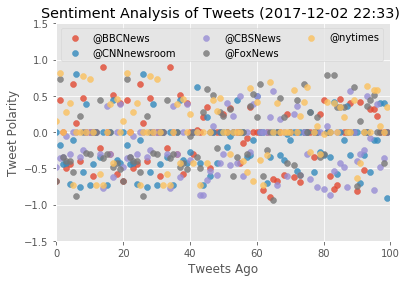

In [7]:
# Create plots
from matplotlib import style
style.use('ggplot')

news_list =[bbc_sen_df,cnn_sen_df,cbs_sen_df,fox_sen_df,nytimes_sen_df]

# Build scatter plots
for news in news_list:
    x = np.arange(len(news["Compound"]))
    plt.scatter(x, news["Compound"], alpha=0.8)



# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) ".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
l = plt.legend(loc = 2, ncol = 3)
l.get_texts()[0].set_text('@BBCNews')
l.get_texts()[1].set_text('@CNNnewsroom')
l.get_texts()[2].set_text("@CBSNews")
l.get_texts()[3].set_text('@FoxNews')
l.get_texts()[4].set_text('@nytimes')

plt.xlim(-.25, len(x))
plt.ylim(-1.5, 1.5)
plt.savefig("combo_sent_analysis.png")
plt.show()

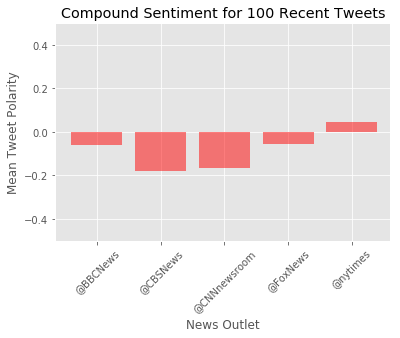

In [8]:
# Build combined sentiment bar chart

targets = ["@BBCNews", "@CBSNews", "@CNNnewsroom",
                "@FoxNews", "@nytimes"]
x_axis = np.arange(len(targets))
values = [bbc_sen_df['Compound'].mean(),cbs_sen_df['Compound'].mean(),cnn_sen_df['Compound'].mean(),fox_sen_df['Compound'].mean(),nytimes_sen_df['Compound'].mean()]
plt.bar(x_axis, values, color='r', alpha=0.5, align="edge")
plt.title("Compound Sentiment for 100 Recent Tweets")
plt.xlabel("News Outlet")
plt.ylabel("Mean Tweet Polarity")
plt.xlim(-.25, len(x_axis))
plt.ylim(-.5, .5)
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, targets,rotation=45)
plt.savefig("agg_bar.png")
plt.show()